In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-ml/Fraud_Data.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load and preprocess the dataset
fraud_data = pd.read_csv('/kaggle/input/fraud-ml/Fraud_Data.csv')
data = fraud_data.drop(columns=['user_id', 'device_id', 'signup_time', 'purchase_time', 'ip_address'])

# Separate features and target variable
X = data.drop(columns=['class'])
y = data['class']

# Define categorical and numerical columns
categorical_columns = ['source', 'browser', 'sex']
numerical_columns = ['purchase_value', 'age']

# Use ColumnTransformer to apply OneHotEncoder to categorical columns and StandardScaler to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ]
)

# Fit and transform the features
X = preprocessor.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert to numpy arrays for TensorFlow
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
6849/6849 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.5152 - loss: 0.6924 - val_accuracy: 0.5447 - val_loss: 0.6871
Epoch 2/20
6849/6849 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5385 - loss: 0.6882 - val_accuracy: 0.5543 - val_loss: 0.6830
Epoch 3/20
6849/6849 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5468 - loss: 0.6847 - val_accuracy: 0.5620 - val_loss: 0.6787
Epoch 4/20
6849/6849 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5545 - loss: 0.6825 - val_accuracy: 0.5712 - val_loss: 0.6773
Epoch 5/20
6849/6849 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5580 - loss: 0.6812 - val_accuracy: 0.5725 - val_loss: 0.6746
Epoch 6/20
6849/6849 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5585 - loss: 0.6802 - val_accuracy: 0.5736 - val_loss: 0.6735
Epoch 7/20
6849/6849 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.5647 - loss: 0.6783 - val_accuracy: 0.5786 - val_loss: 0.6716
Epoch 8/20
6849/6849 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.5644 - loss: 0

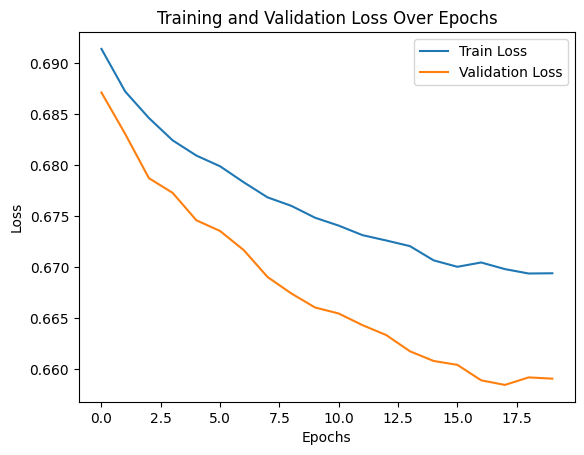

In [3]:
# Define the deep neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [5]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.6590
Test Accuracy: 0.6061


In [4]:
# List of different new data samples for predicting fraud
new_data_list = [
    # Scenario 1: High transaction value, user from an unusual source
    {'source': 'Ads', 'browser': 'Chrome', 'sex': 'M', 'purchase_value': 5000, 'age': 25},
    
    # Scenario 2: Low age, high purchase value (possible misuse of account)
    {'source': 'Direct', 'browser': 'FireFox', 'sex': 'F', 'purchase_value': 3000, 'age': 18},
    
    # Scenario 3: Moderate transaction, user from a rare browser
    {'source': 'SEO', 'browser': 'Opera', 'sex': 'M', 'purchase_value': 150, 'age': 35},
    
    # Scenario 4: Small transaction, elderly user (unlikely fraud)
    {'source': 'Direct', 'browser': 'Safari', 'sex': 'F', 'purchase_value': 20, 'age': 70},
    
    # Scenario 5: High purchase value, user from Ads, older age
    {'source': 'Ads', 'browser': 'IE', 'sex': 'M', 'purchase_value': 10000, 'age': 65},
    
    # Scenario 6: Very high transaction, male user, common source
    {'source': 'SEO', 'browser': 'Chrome', 'sex': 'M', 'purchase_value': 20000, 'age': 40},
    
    # Scenario 7: Normal transaction, common source, young user
    {'source': 'Direct', 'browser': 'Chrome', 'sex': 'F', 'purchase_value': 50, 'age': 22},
    
    # Scenario 8: Moderate transaction, older user, rare source
    {'source': 'SEO', 'browser': 'IE', 'sex': 'M', 'purchase_value': 250, 'age': 55},
    
    # Scenario 9: Low transaction, unusual browser
    {'source': 'Ads', 'browser': 'Opera', 'sex': 'F', 'purchase_value': 10, 'age': 30},
    
    # Scenario 10: High transaction, male user, common browser but rare source
    {'source': 'Ads', 'browser': 'FireFox', 'sex': 'M', 'purchase_value': 7000, 'age': 28},
]


new_df = pd.DataFrame(new_data_list)

# Preprocess the new data using the same preprocessor
new_df_transformed = preprocessor.transform(new_df)

# Convert to numpy array for TensorFlow
new_df_array = np.array(new_df_transformed)

# Make predictions
predictions = model.predict(new_df_array)

# Output predictions (fraud probability and class)
for i, prediction in enumerate(predictions):
    fraud_probability = prediction[0]
    fraud_class = 1 if fraud_probability >= 0.5 else 0
    print(f"Sample {i+1}: Fraud Probability: {fraud_probability:.2f}, Predicted Class: {'Fraudulent' if fraud_class == 1 else 'Non-Fraudulent'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Sample 1: Fraud Probability: 0.69, Predicted Class: Fraudulent
Sample 2: Fraud Probability: 1.00, Predicted Class: Fraudulent
Sample 3: Fraud Probability: 0.09, Predicted Class: Non-Fraudulent
Sample 4: Fraud Probability: 0.50, Predicted Class: Non-Fraudulent
Sample 5: Fraud Probability: 0.03, Predicted Class: Non-Fraudulent
Sample 6: Fraud Probability: 1.00, Predicted Class: Fraudulent
Sample 7: Fraud Probability: 0.33, Predicted Class: Non-Fraudulent
Sample 8: Fraud Probability: 0.04, Predicted Class: Non-Fraudulent
Sample 9: Fraud Probability: 0.36, Predicted Class: Non-Fraudulent
Sample 10: Fraud Probability: 0.97, Predicted Class: Fraudulent


# Online Learning

In [7]:

# online learning with SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['source', 'browser', 'sex']  
numerical_features = ['purchase_value', 'age']  

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),  
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

# Create a pipeline that first preprocesses the data, then applies SMOTE, and fits the SGDClassifier
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to balance classes
    ('classifier', SGDClassifier(loss='log', random_state=42, max_iter=1000, tol=1e-3))
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.50      0.64     27373
           1       0.10      0.53      0.17      2850

    accuracy                           0.50     30223
   macro avg       0.51      0.51      0.41     30223
weighted avg       0.83      0.50      0.60     30223



In [8]:
# New sample data for prediction
new_data_list = [
    {'source': 'Ads', 'browser': 'Chrome', 'sex': 'M', 'purchase_value': 5000, 'age': 25},
    {'source': 'Direct', 'browser': 'FireFox', 'sex': 'F', 'purchase_value': 3000, 'age': 18},
    {'source': 'SEO', 'browser': 'Opera', 'sex': 'M', 'purchase_value': 150, 'age': 35},
    {'source': 'Direct', 'browser': 'Safari', 'sex': 'F', 'purchase_value': 20, 'age': 70},
    {'source': 'Ads', 'browser': 'IE', 'sex': 'M', 'purchase_value': 10000, 'age': 65},
    {'source': 'SEO', 'browser': 'Chrome', 'sex': 'M', 'purchase_value': 20000, 'age': 40},
    {'source': 'Direct', 'browser': 'Chrome', 'sex': 'F', 'purchase_value': 50, 'age': 22},
    {'source': 'SEO', 'browser': 'IE', 'sex': 'M', 'purchase_value': 250, 'age': 55},
    {'source': 'Ads', 'browser': 'Opera', 'sex': 'F', 'purchase_value': 10, 'age': 30},
    {'source': 'Direct', 'browser': 'FireFox', 'sex': 'M', 'purchase_value': 7000, 'age': 28},
]

# Convert the new data to a DataFrame
new_data_df = pd.DataFrame(new_data_list)

# Make predictions on the new data
predictions = model.predict(new_data_df)

# Output predictions
for i, prediction in enumerate(predictions):
    print(f"Sample {i + 1}: Predicted Class: {'Fraudulent' if prediction == 1 else 'Non-Fraudulent'}")


Sample 1: Predicted Class: Fraudulent
Sample 2: Predicted Class: Fraudulent
Sample 3: Predicted Class: Fraudulent
Sample 4: Predicted Class: Fraudulent
Sample 5: Predicted Class: Fraudulent
Sample 6: Predicted Class: Fraudulent
Sample 7: Predicted Class: Fraudulent
Sample 8: Predicted Class: Fraudulent
Sample 9: Predicted Class: Non-Fraudulent
Sample 10: Predicted Class: Fraudulent
